# Relax Challenge

**Relax Inc.** makes productivity and project management software that's popular with both individuals and teams. Founded by several former Facebook employees, it's considered a great company to work at.

Defining an **"adopted user"** as a user who has logged into the product on **three separate
days in at least one seven day period** 

### Identify which factors predict future user adoption.


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
users = pd.read_csv('takehome_users.csv', encoding='latin-1', parse_dates=['creation_time'])
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'], unit='s')

In [54]:
users.info() 

# last_session_creation_time contains many nan, perhaps because they never signedin
# Invited_by_user_id contains many nan, these are the observations that were not invited presumably

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [7]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [32]:
engage = pd.read_csv('takehome_user_engagement.csv', encoding='latin-1', parse_dates=['time_stamp'])

In [51]:
engage.head() # Each timestamp is a login, sorted by user_id

,time_stamp,user_id,visited,week
0,2014-04-22 03:53:30,1,1,2014-16
1,2013-11-15 03:45:04,2,1,2013-45
2,2013-11-29 03:45:04,2,1,2013-47
3,2013-12-09 03:45:04,2,1,2013-49
4,2013-12-25 03:45:04,2,1,2013-51


In [34]:
# Create a column of the year and the week of the year
engage['week'] = engage['time_stamp'].dt.strftime('%Y-%U')

In [41]:
engage.tail(1) # There appear to be 12,000 use ID's

,time_stamp,user_id,visited,week
207916,2014-01-26 08:57:12,12000,1,2014-04


In [35]:
weeks = engage.groupby(['user_id', 'week']).size().reset_index().rename(columns={0:'count'})

# Grouped by user ID and week, got the size of each, reset the index, and renamed what became the '0' column, which is the size,
# to be called 'count'

weeks.head()

,user_id,week,count
0,1,2014-16,1
1,2,2013-45,1
2,2,2013-47,1
3,2,2013-49,1
4,2,2013-51,1


In [38]:
# Adopted user is one who has logged into the product on 3 separate days in at least one 7-day period. 
adopted = weeks.loc[weeks['count'] >= 3].user_id.unique()

adopted

array([   10,    20,    42, ..., 11969, 11975, 11988], dtype=int64)

In [42]:
print('Number of Adopted Users: {}'.format(len(adopted)))
print('Percentage of Adopted Users: {:.2f}%'.format(len(adopted)/users.shape[0]*100))

Number of Adopted Users: 1432
Percentage of Adopted Users: 11.93%


In [60]:
users['adopted'] = (users['object_id'].isin(adopted)) 

# Added an adopted column to the users dataframe, if the adopted user id matches the user id in each users row
# the value will be True, if it does not, it will be false.

# Statistics on Adopted Users

## Summary Findings
<br>
1. By the means of how the user signed up show a significant trend; users who were invited by a guest are among the largest group of retain users at 15%, and with users who signed up through Gmail as their identification right behind. Users who were invited to work on a personal project were among the lowest percent of retained users at 6.5%. This makes sense as their use for the software was probably temporary, the original inviter is likely a retained user. <br>
<br>
2. Hotmail users are the highest retained users at 15%, and Yahoo users are at the lowest at 9% This is likely arbitrary, but it's possible theres a reason why. <br>
<br>
3. Can see a downward trend that the greater the organization size, the lower the retention. A Pearson correlation of -.49 confirms this trend. <br>
<br>
4. Of all the users that created a session time in the latest month of June 2014, about 90% were adopted users, and of the month before that in May, 40% of users were adopted users.

### Creation Method

In [61]:
# How their accounts were created? Invited to join personal project, to join organization as a full
# member or as a guest? Sign up via website or google authentication?

users.creation_source.value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

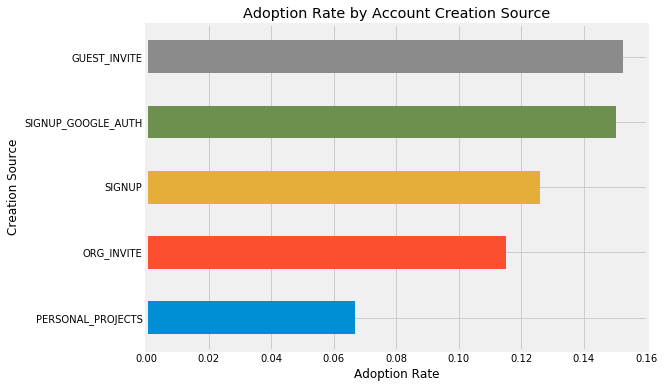

In [76]:
plt.figure(figsize=(8, 6))


users.groupby('creation_source')['adopted'].mean().sort_values().plot(kind='barh')

plt.title('Adoption Rate by Account Creation Source')
plt.xlabel('Adoption Rate')
plt.ylabel('Creation Source')
plt.show()

### Email Domain Source

In [99]:
# Lets identify the importance on a users domain email has on their retention factor

users['domain'] = users['email'].map(lambda x: x.split('@')[1]) 

#split the email on the '@' symbol, and retreive only the email domain, not the user email name ([0])

users.domain.value_counts().nlargest(10) #The amount of random email domains with 2 or less are plentiful


gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
gustr.com         1179
hotmail.com       1165
xybhi.com            2
xvnbr.com            2
qgjbc.com            2
mumdc.com            2
Name: domain, dtype: int64

In [103]:
random = (users.domain != 'gmail.com') & (users.domain != 'yahoo.com') & (users.domain != 'hotmail.com') & (users.domain != 'jourrapide.com') & (users.domain != 'gustr.com') & (users.domain != 'cuvox.de')
users.loc[random, 'domain'] = 'random website'

# Label all of the non major emails as random website

users['domain'].value_counts().nlargest(10)

gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
random website    1186
gustr.com         1179
hotmail.com       1165
Name: domain, dtype: int64

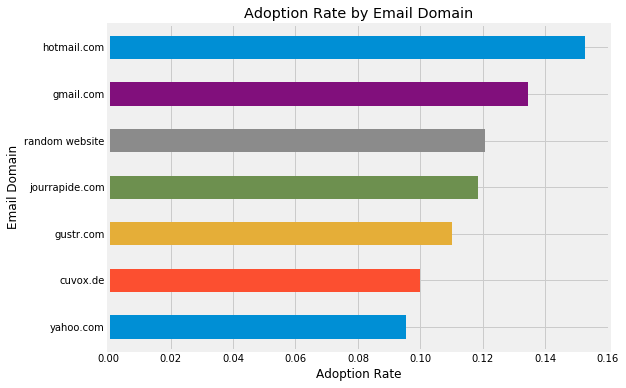

In [107]:
plt.figure(figsize=(8, 6))

users.groupby(['domain'])['adopted'].mean().sort_values().plot(kind='barh')
plt.xlabel('Adoption Rate')
plt.ylabel('Email Domain')
plt.title('Adoption Rate by Email Domain')
plt.show()

### Organization Size

In [109]:
org_size = users.org_id.value_counts()
users['org_size'] = users.org_id.map(org_size)

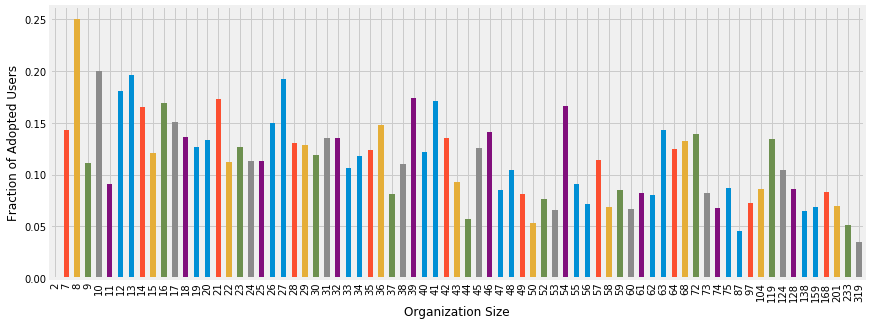

In [110]:
users.groupby('org_size')['adopted'].mean().plot(kind='bar', figsize=(13,5))
plt.xlabel('Organization Size')
plt.ylabel('Fraction of Adopted Users')
plt.show()

# Can see a downward trend that the greater the organization size, the lower the retention

In [119]:
org_size = users.groupby('org_size')['adopted'].mean()
org_size = pd.DataFrame(org_size).reset_index()
org_size.corr() 

# -.49 pearson correlation confirms this

,org_size,adopted
org_size,1.000000,-0.497118
adopted,-0.497118,1.000000


###  Last Session Creation Time

In [127]:
# Missing last session creation time means they are not adopting the product. 
users['missing'] = users.last_session_creation_time.isnull()

users.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,domain,org_size,missing
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,False,yahoo.com,75,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,False,gustr.com,233,False
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,False,gustr.com,32,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,False,yahoo.com,233,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,False,yahoo.com,16,False
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,2013-12-19 03:37:06,0,0,197,11241.0,False,yahoo.com,14,False
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,2012-12-20 13:24:32,0,1,37,NaN,False,jourrapide.com,44,False
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaT,1,1,74,NaN,False,yahoo.com,38,True
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,302,NaN,False,hotmail.com,19,True
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,2014-06-03 22:08:03,1,1,318,4143.0,True,gustr.com,17,False


In [128]:
users.groupby('missing')['adopted'].mean() #All the adopted users have of course had a session

missing
False    0.162303
True     0.000000
Name: adopted, dtype: float64

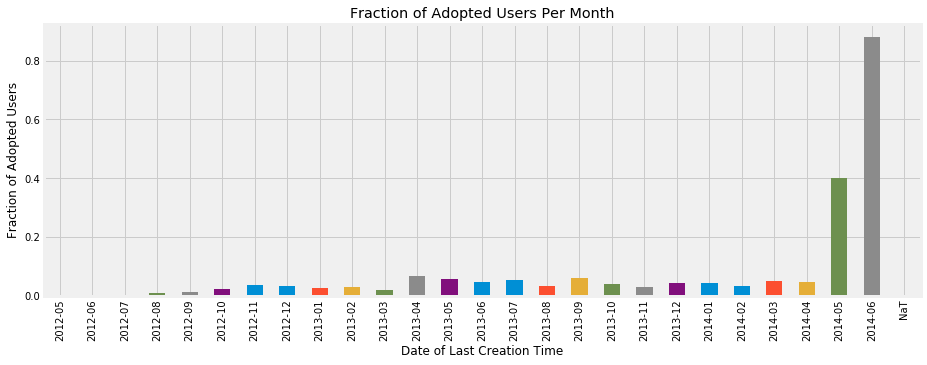

In [130]:
users['last_date'] = pd.to_datetime(users['last_session_creation_time'].dt.date)
users['last_month'] = users['last_date'].dt.strftime('%Y-%m')
users.groupby('last_month')['adopted'].mean().plot(kind='bar', figsize=(14,5))
plt.xlabel('Date of Last Creation Time')
plt.ylabel('Fraction of Adopted Users')
plt.title('Fraction of Adopted Users Per Month')
plt.show()